In [1]:
# Import dependencies

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the dataset
data = pd.read_csv("iris.csv", index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


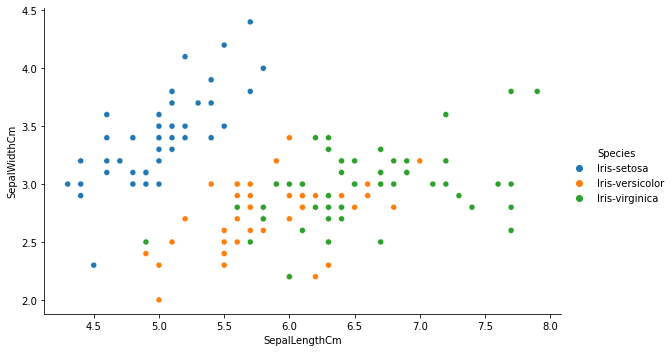

In [12]:
# plot SepalLengthCm vs SepalWidthCm
sns.relplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='Species', aspect=1.61)
plt.show()

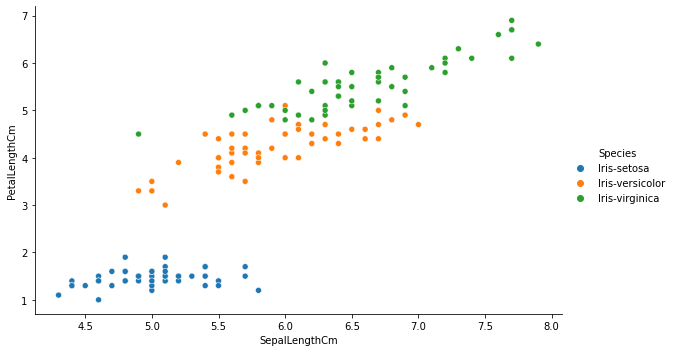

In [13]:
# plot SepalLengthCm vs PetalLengthCm
sns.relplot(data=data, x='SepalLengthCm', y='PetalLengthCm', hue='Species', aspect=1.61)
plt.show()

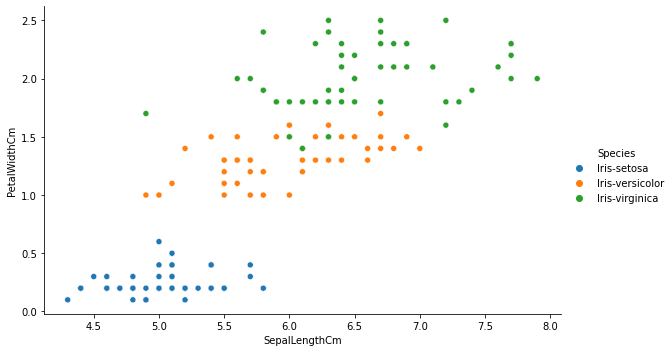

In [14]:
# plot SepalLengthCm vs PetalWidthCm
sns.relplot(data=data, x='SepalLengthCm', y='PetalWidthCm', hue='Species', aspect=1.61)
plt.show()

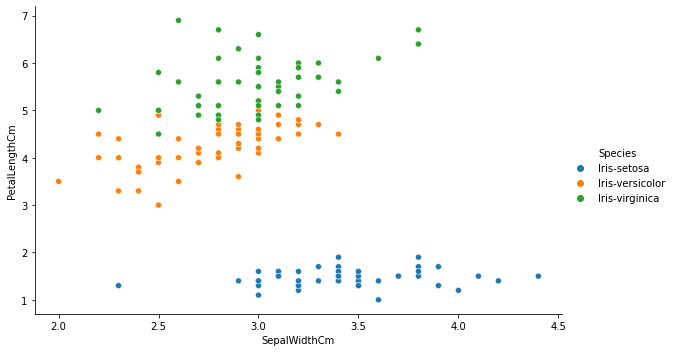

In [16]:
# plot SepalWidthCm vs PetalLengthCm
sns.relplot(data=data, x='SepalWidthCm', y='PetalLengthCm', hue='Species', aspect=1.61)
plt.show()

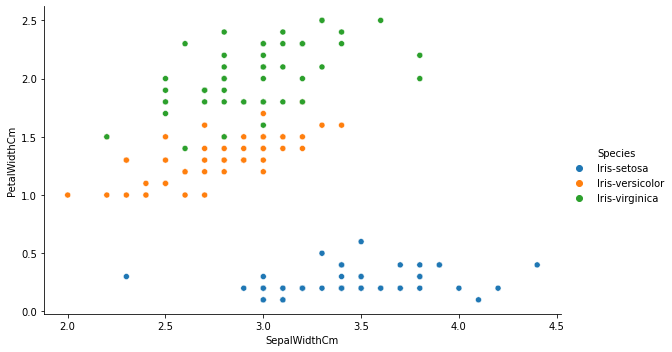

In [17]:
# plot SepalWidthCm vs PetalWidthCm
sns.relplot(data=data, x='SepalWidthCm', y='PetalWidthCm', hue='Species', aspect=1.61)
plt.show()

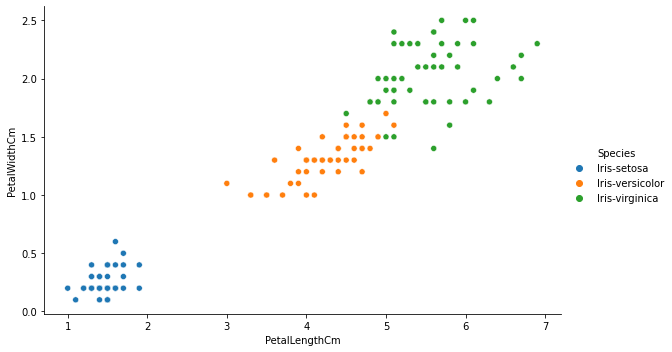

In [18]:
# plot PetalLengthCm vs PetalWidthCm
sns.relplot(data=data, x='PetalLengthCm', y='PetalWidthCm', hue='Species', aspect=1.61)
plt.show()

SepalwidthCm vs PetalWidthCm and PetalWidthCm vs PetalLengthCm seem to me to be the 2 best for clustering as

In [25]:
# scatter k means function
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.legend()
    plt.show()

    

C:\Users\xavim\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


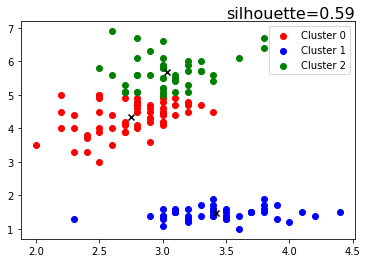

In [26]:
# plot with k of 3 and SepalWidthCm vs PetalLengthCm
X = data[['SepalWidthCm','PetalLengthCm']].values.reshape(-1,2)
scatter_Kmeans(X, 3)

C:\Users\xavim\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


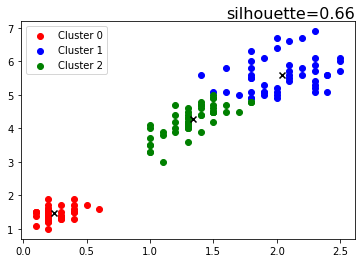

In [27]:
# plot with k of 3 and PetalWidthCm vs PetalLengthCm
X = data[['PetalWidthCm','PetalLengthCm']].values.reshape(-1,2)
scatter_Kmeans(X, 3)

The best score was achieved with petal length vs width